In [8]:
import pandas as pd # Use the work with the dataframes
import numpy as np  # Mainly use to assing nan values as np.nan
import matplotlib.pyplot as plt # Visualitzation
from matplotlib.ticker import MaxNLocator # Visualitzation
import statistics  # Uses to compute statistics
import os
import scipy.interpolate
from collections import Counter
import matplotlib.dates as mdates
from main import *

p21_9300_LH = pd.read_csv(r'/Users/rprocious/Downloads/data2/lighthouse/Pier 21/Pier21_1993-2000_pwl_harmwl_bwl.csv')
#p21_9300_LH = pd.read_csv(r'C:\Users\mrpro\OneDrive\Desktop\Data_Analysis_Project\data\lighthouse\Pier 21\Pier21_1993-2000_pwl_harmwl_bwl.csv')
p21_9300_LH.drop(labels=range(701280,701286),axis = 0, inplace = True)

p21_0112_LH = pd.read_csv(r'/Users/rprocious/Downloads/data2/lighthouse/Pier 21/Pier21_2001-2012_pwl_harmwl_bwl.csv')
#p21_0112_LH = pd.read_csv(r'C:\Users\mrpro\OneDrive\Desktop\Data_Analysis_Project\data\lighthouse\Pier 21\Pier21_2001-2012_pwl_harmwl_bwl.csv')
p21_0112_LH.drop(labels=range(1051920,1051926), axis = 0, inplace=True)

p21_1323_LH = pd.read_csv(r'/Users/rprocious/Downloads/data2/lighthouse/Pier 21/Pier21_2013-2023_pwl_harmwl_bwl.csv')
#p21_1323_LH = pd.read_csv(r'C:\Users\mrpro\OneDrive\Desktop\Data_Analysis_Project\data\lighthouse\Pier 21\Pier21_2013-2023_pwl_harmwl_bwl.csv')
p21_1323_LH.drop(labels=range(len(p21_1323_LH)-6,len(p21_1323_LH)), axis=0, inplace=True)

directory_path = '/Users/rprocious/Downloads/data/NOAA/pier21/'
#directory_path = r'C:\Users\mrpro\OneDrive\Desktop\Data_Analysis_Project\data\NOAA\pier21'
dataframes = []

# Loop through the files in the directory
for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('level.csv'):

        file_path = os.path.join(directory_path, filename)
        
        
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

p21_NOAA = pd.concat(dataframes, ignore_index=True)
frames = [p21_9300_LH,p21_0112_LH,p21_1323_LH]
p21_LH = pd.concat(frames, ignore_index=True)
p21_NOAA.drop(labels=range(0,3), axis = 0,inplace=True)
p21_NOAA.reset_index(drop = True, inplace=True)
p21_LH.drop(labels=range(0,262800),axis=0, inplace=True)
p21_LH.reset_index(drop=True, inplace=True)
comparison_df_P21 = pd.DataFrame()
comparison_df_P21['Dates'] = p21_LH['#date+time']
comparison_df_P21['Lighthouse WL'] = p21_LH['022-pwl']
comparison_df_P21['NOAA WL'] = p21_NOAA[' Water Level']
comparison_df_P21['Dates'] = pd.to_datetime(comparison_df_P21['Dates'])
comparison_df_P21['Lighthouse WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df_P21['NOAA WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df_P21['Lighthouse WL'] = pd.to_numeric(comparison_df_P21['Lighthouse WL'],errors= 'coerce')
comparison_df_P21['NOAA WL'] = pd.to_numeric(comparison_df_P21['NOAA WL'],errors='coerce')

#P21_2007 = pd.read_csv(r'C:\Users\rprocious\PSM Lighthouse\CBI\2007-08 NWLON Station 6min Corrections\2007-08 NWLON Station 6min Corrections\bob-hall-2007-output.csv')
P21_2007 = pd.read_csv('/Users/rprocious/Waterlevels_CBI/CBI-2/2007-08 NWLON Station 6min Corrections/2007-08 NWLON Station 6min Corrections/pier21-2007-output.csv')
#P21_2008 = pd.read_csv(r'C:\Users\rprocious\PSM Lighthouse\CBI\2007-08 NWLON Station 6min Corrections\2007-08 NWLON Station 6min Corrections\bob-hall-2008-output.csv')
P21_2008 = pd.read_csv('/Users/rprocious/Waterlevels_CBI/CBI-2/2007-08 NWLON Station 6min Corrections/2007-08 NWLON Station 6min Corrections/pier21-2008-output.csv')
P21_2007.reset_index(drop = True, inplace=True)
P21_2008.reset_index(drop = True, inplace=True)
P21_2007.replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
P21_2007['Dates'] = pd.to_datetime(P21_2007['Date'])
P21_2007['Water Level'] = pd.to_numeric(P21_2007['Water Level'], errors='coerce')
P21_2008.replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
P21_2008['Dates'] = pd.to_datetime(P21_2008['Date'])
P21_2008['Water Level'] = pd.to_numeric(P21_2008['Water Level'], errors='coerce')
P21 = pd.concat([P21_2007,P21_2008],ignore_index=True)
total_df = P21.merge(comparison_df_P21,on='Dates')
total_df = total_df.drop(columns='Station #',axis=0)
total_df = total_df.drop(columns='Date',axis=0)
total_df['NES WL'] = total_df["Water Level"]


FileNotFoundError: [Errno 2] No such file or directory: '/Users/rprocious/Downloads/data2/lighthouse/Pier 21/Pier21_1993-2000_pwl_harmwl_bwl.csv'

In [5]:
total_df

,Water Level,Dates,Lighthouse WL,NOAA WL,NES WL
0,1.710,2006-12-31 23:36:00,1.710,1.710,1.710
1,1.737,2006-12-31 23:42:00,1.737,1.737,1.737
2,1.737,2006-12-31 23:42:00,1.737,1.737,1.737
3,1.718,2006-12-31 23:48:00,1.718,1.718,1.718
4,1.718,2006-12-31 23:48:00,1.718,1.718,1.718
...,...,...,...,...,...
256169,1.540,2008-12-31 23:24:00,1.540,1.540,1.540
256170,1.549,2008-12-31 23:30:00,1.549,1.549,1.549
256171,1.529,2008-12-31 23:36:00,1.529,1.529,1.529
256172,1.540,2008-12-31 23:42:00,1.540,1.540,1.540


Text(0.5, 1.0, 'Lighthouse and NOAA Offset')

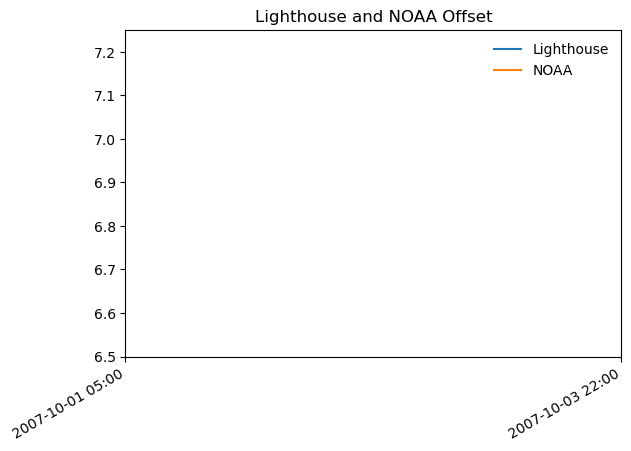

In [7]:

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

plt.gcf().autofmt_xdate()

plt.ylim(6.5,7.25)

start_date = pd.to_datetime('2007-10-01 05:00')

end_date = pd.to_datetime('2007-10-03 22:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Lighthouse and NOAA Offset')